In [1]:
import numpy as np
import pandas as pd

np.random.seed(17)

In [14]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# %cd /content/drive/Shareddrives/Deep\ Learning\ Project/Project/stock_market_data/sp500/csv/
%cd /content/drive/Shareddrives/Deep Learning Project/Project/data

/content/drive/Shareddrives/Deep Learning Project/Project/data


In [7]:
sp = pd.read_csv("SPX_2.csv")
sp["Date"] = pd.to_datetime(sp['Date'])
sp = sp[['Date', 'Open', 'High', 'Low', 'Close']]
sp = sp.sort_values('Date', ascending=True)
start_date = pd.to_datetime('1980-01-01')
sp = sp[sp['Date'] >= start_date]
# sp.set_index('Date', inplace=True)
sp_close = sp[['Date','Close']]

In [8]:
sp

,Date,Open,High,Low,Close
13022,1980-01-02,107.940002,108.430000,105.290001,105.760002
13023,1980-01-03,105.760002,106.080002,103.260002,105.220001
13024,1980-01-04,105.220001,107.080002,105.089996,106.519997
13025,1980-01-07,106.519997,107.800003,105.800003,106.809998
13026,1980-01-08,106.809998,109.290001,106.290001,108.949997
...,...,...,...,...,...
23318,2020-10-29,3277.169922,3341.050049,3259.820068,3310.110107
23319,2020-10-30,3293.590088,3304.929932,3233.939941,3269.959961
23320,2020-11-02,3296.199951,3330.139893,3279.739990,3310.239990
23321,2020-11-03,3336.250000,3389.489990,3336.250000,3369.159912


ADF Statistic: 1.610005
p-value: 0.997887


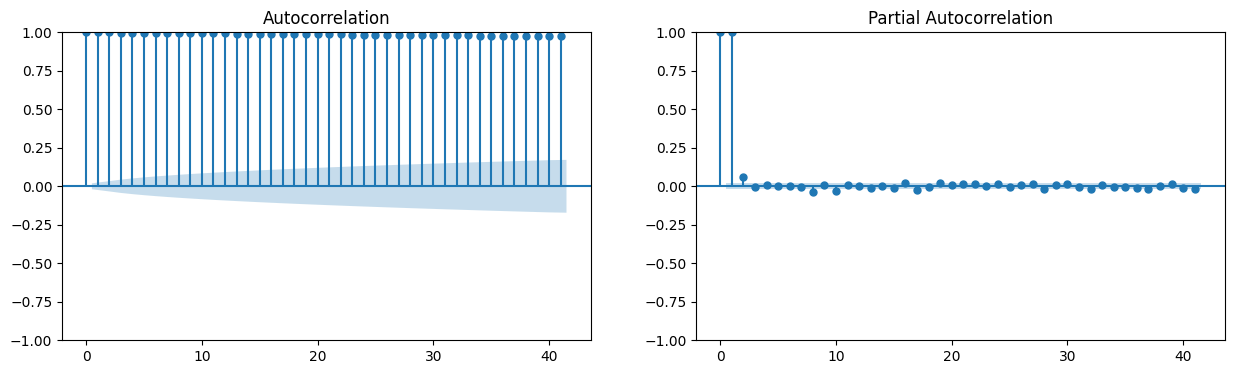

In [9]:
result = adfuller(sp['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If data is not stationary, difference the data
if result[1] > 0.05:
    sp['Close_diff'] = sp['Close'].diff().dropna()

# Determine the ARIMA parameters using ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(15,4))
plot_acf(sp['Close'].dropna(), ax=axes[0])
plot_pacf(sp['Close'].dropna(), ax=axes[1])
plt.show()

In [10]:
sp_close

,Date,Close
13022,1980-01-02,105.760002
13023,1980-01-03,105.220001
13024,1980-01-04,106.519997
13025,1980-01-07,106.809998
13026,1980-01-08,108.949997
...,...,...
23318,2020-10-29,3310.110107
23319,2020-10-30,3269.959961
23320,2020-11-02,3310.239990
23321,2020-11-03,3369.159912


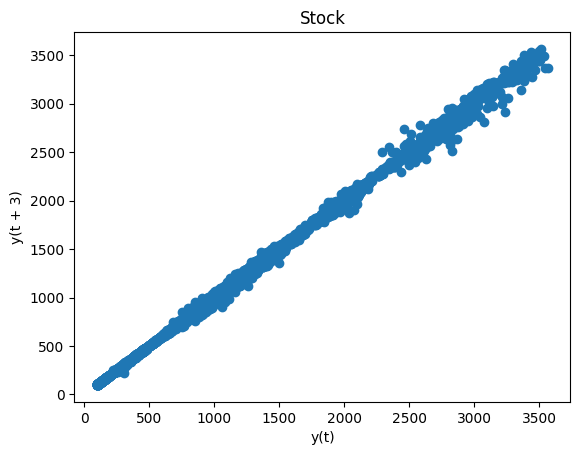

In [11]:
plt.figure()
lag_plot(sp['Open'], lag=3)
plt.title('Stock')
plt.show()

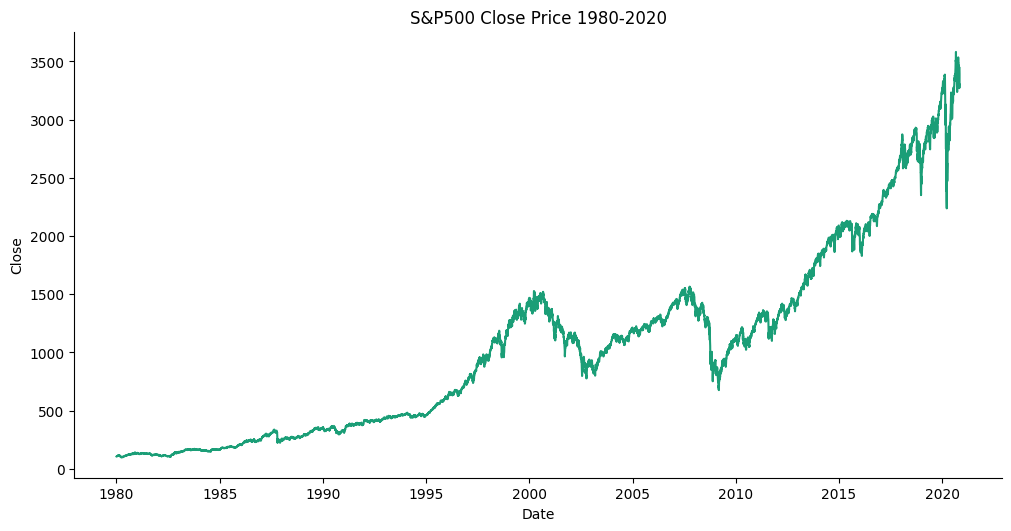

In [12]:
# @title Date vs close

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sp.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.title("S&P500 Close Price 1980-2020")
plt.xlabel('Date')
_ = plt.ylabel('Close')

In [17]:
train_data, test_data = sp[0:int(len(sp)*0.7)], sp[int(len(sp)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MAE_error = mean_absolute_error(test_data, model_predictions)
print('Testing Mean Absolute Error is {}'.format(MAE_error))

Testing Mean Absolute Error is 14.55621210661639


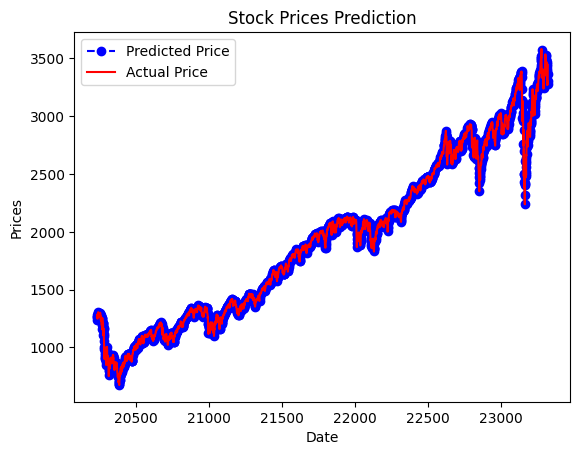

In [18]:
test_set_range = sp[int(len(sp)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Stock Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])

plt.legend()
plt.show()